In [7]:
pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
myfile=open(pd+"aGQ-panel-mbuti.f3.log",'r')
newfile=open(pd+"allpops.txt",'w')
for line in myfile:
    x=line.split()
    if x[1]=="Zongri1a":
        newfile.write(x[2]+'\n')
newfile.close()
myfile.close()

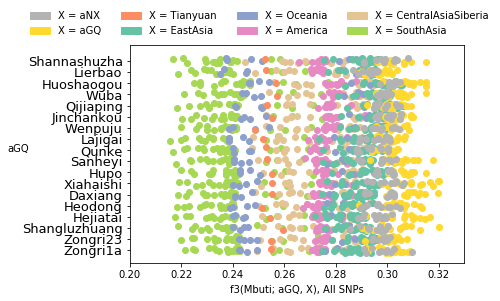

In [43]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

fig = plt.figure() #figsize=(10,5))
ax1=fig.add_subplot(1,1,1)
myleglabels=sorted(mysets.keys())[::-1]
#mycolors  = [(0.40000000000000002, 0.76078431372549016, 0.6470588235294118), (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), (1.0, 0.85098039215686272, 0.18431372549019609), (0.89803921568627454, 0.7686274509803922, 0.58039215686274515), (0.70196078431372544, 0.70196078431372544, 0.70196078431372544), (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), (1.0, 0.85098039215686272, 0.18431372549019609)]
##Paired: sns.color_palette("Paired",12)

mycolors=["gray",(0.65098039215686276, 0.80784313725490198, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.70588235294117652), (0.69803921568627447, 0.87450980392156863, 0.54117647058823526), (0.20000000000000001, 0.62745098039215685, 0.17254901960784313), (0.98431372549019602, 0.60392156862745094, 0.59999999999999998), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.99215686274509807, 0.74901960784313726, 0.43529411764705883), (1.0, 0.49803921568627452, 0.0), (0.792156862745098, 0.69803921568627447, 0.83921568627450982), (0.41568627450980394, 0.23921568627450981, 0.60392156862745094), (1.0, 1.0, 0.59999999999999998), (0.69411764705882351, 0.34901960784313724, 0.15686274509803921)]
#mycolors=[(0.10588235294117647, 0.61960784313725492, 0.46666666666666667), (0.85098039215686272, 0.37254901960784315, 0.0078431372549019607), (0.45882352941176469, 0.4392156862745098, 0.70196078431372544), (0.90588235294117647, 0.16078431372549021, 0.54117647058823526), (0.40000000000000002, 0.65098039215686276, 0.11764705882352941), (0.90196078431372551, 0.6705882352941176, 0.0078431372549019607), (0.65098039215686276, 0.46274509803921571, 0.11372549019607843), (0.40000000000000002, 0.40000000000000002, 0.40000000000000002)]

##Based on Set2 palette, moved some colors around
mycolors=[(0.70196078431372544, 0.70196078431372544, 0.70196078431372544),
          (1.0, 0.85098039215686272, 0.18431372549019609),         
          (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), 
          (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), 
          (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), 
          (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), 
          (0.89803921568627454, 0.7686274509803922, 0.58039215686274515),
         (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), ]
mycolors=mycolors[::-1]
#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
handles1=[]
for ind1,myind in enumerate(myinds):
    for ind2,myregion in enumerate(myregions):
        myxs=[ind1+1+random.uniform(-0.25,0.25) for i in myys[myind][myregion]]
        ax1.scatter(myys[myind][myregion],myxs,marker='o',facecolor=mycolors[ind2],edgecolor=mycolors[ind2])
        if ind1==0:
            handles1.append(mpatches.Patch([],[],color=mycolors[ind2],label="X = "+myregion))
ax1.set_yticks(np.array(range(1,len(myinds)+1)))
#ax1.set_ylim((0,0.4))
ax1.set_yticklabels(myinds,fontsize=13)
ax1.set_xlabel("f3(Mbuti; %s, X), %s" % (popname,tv1))
ax1.set_ylabel(popname,rotation=360)
ax1.set_xlim((0.2,0.33))
ax1.legend(handles=handles1[::-1],loc=1,bbox_to_anchor=(1.1,1.2),frameon=False,ncol=4) #
plt.show()

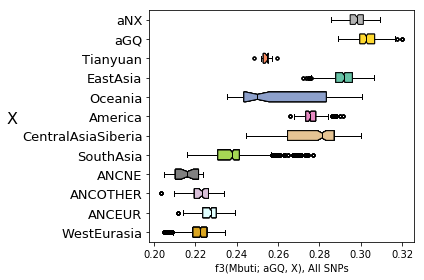

In [116]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
fig = plt.figure() #figsize=(10,5))
ax1=fig.add_subplot(1,1,1)
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia',
             'ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1]
flierprops = dict(marker='.')
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

biglst=[]
for region in myregions:
    mylst=[]
    for i in myys: mylst+=myys[i][region]
    biglst.append(mylst)

    box=ax1.boxplot(biglst,vert=False,notch=True,patch_artist=True, 
                    flierprops=flierprops, medianprops=medianprops)

ax1.set_yticklabels(myregions,fontsize=13)
ax1.set_xlabel("f3(Mbuti; %s, X), %s" % (popname,tv1))
ax1.set_ylabel("X  ",rotation=360,fontsize=16)
mycolors=[(0.70196078431372544, 0.70196078431372544, 0.70196078431372544),
          (1.0, 0.85098039215686272, 0.18431372549019609),         
          (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), 
          (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), 
          (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), 
          (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), 
          (0.89803921568627454, 0.7686274509803922, 0.58039215686274515),
         (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), 
         "gray","thistle","lightcyan","goldenrod"][::-1]
for patch, color in zip(box['boxes'], mycolors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
plt.tight_layout()
plt.show()

In [ ]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
fig = plt.figure() #figsize=(10,5))
ax1=fig.add_subplot(1,1,1)
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia',
             'ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1]
flierprops = dict(marker='.')
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

biglst=[]
for region in myregions:
    mylst=[]
    for i in myys: mylst+=myys[i][region]
    biglst.append(mylst)

    box=ax1.boxplot(biglst,vert=False,notch=True,patch_artist=True, 
                    flierprops=flierprops, medianprops=medianprops)

ax1.set_yticklabels(myregions,fontsize=13)
ax1.set_xlabel("f3(Mbuti; %s, X), %s" % (popname,tv1))
ax1.set_ylabel("X  ",rotation=360,fontsize=16)
mycolors=[(0.70196078431372544, 0.70196078431372544, 0.70196078431372544),
          (1.0, 0.85098039215686272, 0.18431372549019609),         
          (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), 
          (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), 
          (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), 
          (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), 
          (0.89803921568627454, 0.7686274509803922, 0.58039215686274515),
         (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), 
         "gray","thistle","lightcyan","goldenrod"][::-1]
for patch, color in zip(box['boxes'], mycolors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
plt.tight_layout()
plt.show()

In [50]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
newdict={}
myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
             'America','ANCNE','ANCOTHER','ANCEUR','WestEurasia']
for region in myregions:
    mylst=[]
    for i in myys: mylst+=myys[i][region]
    print region, "%.3f\t%.3f" % (np.mean(mylst), np.std(mylst))    

aNX 0.298	0.005
aGQ 0.303	0.006
EastAsia 0.291	0.007
Oceania 0.262	0.021
SouthAsia 0.238	0.012
CentralAsiaSiberia 0.277	0.013
ANCEAS nan	nan
America 0.276	0.004
ANCNE 0.216	0.006
ANCOTHER 0.222	0.006
ANCEUR 0.227	0.005
WestEurasia 0.221	0.006


KeyError: 'Mbuti'

In [124]:
from plateaumodules import piid1, parseoutf3
import collections
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
eas=["Oroqen","Hezhen","Daur","Xibo","Tu","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi"] #,"Tibetan","Sherpa"]

popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
#popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

myinds=agq
myregions=anx+eas
out="Mbuti"
myys=collections.defaultdict(list)
for ind,smallpop in enumerate(myregions):
    for i in myinds: myys[smallpop].append(myf3dat[i][(i,smallpop,out)][0])
                
newdict={}
for region in eas+anx:
    print region, "%.3f\t%.3f" % (np.mean(myys[region]), np.std(myys[region]))    

Oroqen 0.285	0.004
Hezhen 0.285	0.004
Daur 0.284	0.004
Xibo 0.284	0.006
Tu 0.280	0.004
Japanese 0.285	0.005
Korean 0.288	0.005
Han 0.285	0.005
She 0.285	0.006
Miao 0.285	0.004
Tujia 0.286	0.004
Dai 0.280	0.006
Kinh 0.281	0.006
Lahu 0.282	0.005
Ami 0.283	0.005
Atayal 0.280	0.007
Naxi 0.287	0.004
Yi 0.288	0.004
Pukagongma 0.294	0.007
Pukagongma7 0.291	0.006
Yushu 0.295	0.004
Redilong 0.297	0.004
Xiaoenda 0.292	0.003
Butaxiongqu 0.290	0.004
Caixiutang 0.293	0.004
Chokhopani 0.285	0.006
Mebrak 0.289	0.006
Samdzong 0.284	0.004


In [3]:
from plateaumodules import piid1, parseoutf3
import collections
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
eas=["Oroqen","Hezhen","Daur","Xibo","Tu","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi"] #,"Tibetan","Sherpa"]

popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
#popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

myinds=agq
myregions=anx
out="Mbuti"
myys=collections.defaultdict(list)
for ind,smallpop in enumerate(myregions):
    for i in myinds: myys[i].append(myf3dat[i][(i,smallpop,out)][0])
                
newdict={}
for region in myinds:
    print region, "%.3f\t%.3f" % (np.mean(myys[region]), np.std(myys[region]))    

Zongri1a 0.289	0.005
Zongri23 0.291	0.004
Shangluzhuang 0.289	0.007
Hejiatai 0.290	0.005
Heodong 0.293	0.005
Daxiang 0.293	0.006
Xiahaishi 0.293	0.006
Hupo 0.294	0.004
Sanheyi 0.290	0.007
Qunke 0.288	0.007
Lajigai 0.289	0.005
Wenpuju 0.286	0.008
Jinchankou 0.291	0.005
Qijiaping 0.292	0.006
Wuba 0.293	0.002
Huoshaogou 0.295	0.003
Lierbao 0.286	0.005
Shannashuzha 0.295	0.010


In [1]:
import pandas as pd

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
mypops=piid1(pd+"allpops_detailed.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
#print mysets
myfile=open(pd+"aGQ-panel-mbuti.f3.log",'r')
for line in myfile:
    x=line.split()
    print x
    break

df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

ImportError: No module named pandas

153
0 ('Zongri23', 'Zongri1a')
10 ('Daxiang', 'Zongri1a')
20 ('Xiahaishi', 'Daxiang')
30 ('Sanheyi', 'Shangluzhuang')
40 ('Qunke', 'Heodong')
50 ('Lajigai', 'Daxiang')
60 ('Wenpuju', 'Daxiang')
70 ('Jinchankou', 'Heodong')
80 ('Qijiaping', 'Shangluzhuang')
90 ('Qijiaping', 'Jinchankou')
100 ('Wuba', 'Qunke')
110 ('Huoshaogou', 'Daxiang')
120 ('Lierbao', 'Zongri1a')
130 ('Lierbao', 'Lajigai')
140 ('Shannashuzha', 'Heodong')
150 ('Shannashuzha', 'Wuba')


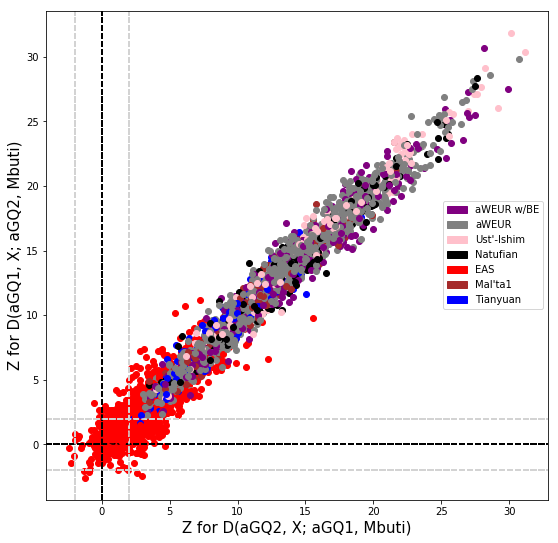

In [12]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
#agq=["Zongri1a","Zongri23"]
#eur=["French","Sardinian","Finnish"]

eas=["Han","Dai","Ami","Daur","Sherpa","Tibetan","Naxi","Yi"]
aeur=["Kostenki14","Vestonice16","GoyetQ116-1","ElMiron","Villabruna","Loschbour"]
aeur2=["Satsurblia","Kotias"]
natufian=["Natufian"]
ane=["Malta1"]
ancother=["UstIshim"]
othereas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
varypops=[othereas, ane,eas,natufian,ancother, aeur,aeur2][::-1]
labels=["Tianyuan","Mal'ta1","EAS",'Natufian',"Ust'-Ishim","aWEUR",'aWEUR w/BE'][::-1] #/Papuan/Onge/Oase1
dxcluster=agq
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    if ind % 10==0: print ind,mypair
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(aGQ1, X; aGQ2, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(aGQ2, X; aGQ1, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        #if ivp==0:
        #    handles1.append(mlines.Line2D([],[],marker=markers[ind],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
#ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

In [ ]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
agq=["Zongri1a","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi","Hupo","Sanheyi"]
#agq=["Zongri1a","Zongri23"]
#eur=["French","Sardinian","Finnish"]

eas=["Han","Dai","Ami","Daur","Sherpa","Tibetan","Naxi","Yi"]
aeur=["Kostenki14","Vestonice16","GoyetQ116-1","ElMiron","Villabruna","Loschbour"]
aeur2=["Satsurblia","Kotias"]
natufian=["Natufian"]
ane=["Malta1"]
ancother=["UstIshim"]
othereas=["Han"] #,"Papuan","Onge","Oase1","Stuttgart",
varypops=[othereas][::-1]
labels=['Han'][::-1] #/Papuan/Onge/Oase1
dxcluster=agq
anxcluster=["Pukagongma","Pukagongma7"]
dxpairs=[(i,j) for indi,i in enumerate(anxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    if ind % 10==0: print ind,mypair
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(aNX, X; aGQ, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(aGQ, X; aNX, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        #if ivp==0:
        #    handles1.append(mlines.Line2D([],[],marker=markers[ind],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
#ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

In [ ]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
#agq=["Zongri1a","Zongri23"]
#eur=["French","Sardinian","Finnish"]

eas=["Han","Dai","Ami","Daur","Sherpa","Tibetan","Naxi","Yi"]
aeur=["Kostenki14","Vestonice16","GoyetQ116-1","ElMiron","Villabruna","Loschbour"]
aeur2=["Satsurblia","Kotias"]
natufian=["Natufian"]
ane=["Malta1"]
ancother=["UstIshim"]
othereas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
varypops=[othereas, ane,natufian,ancother, aeur,aeur2][::-1]
labels=["Tianyuan","Mal'ta1",'Natufian',"Ust'-Ishim","aWEUR",'aWEUR w/BE'][::-1] #/Papuan/Onge/Oase1
dxcluster=agq
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(eas)] # if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    if ind % 10==0: print ind,mypair
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(aGQ1, X; aGQ2, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(aGQ2, X; aGQ1, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        #if ivp==0:
        #    handles1.append(mlines.Line2D([],[],marker=markers[ind],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
#ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

['N v C', 'N v S', 'N v W1', 'N v W2', 'C v S', 'C v W1', 'C v W2', 'S v W1', 'S v W2', 'W1 v W2']
10
0 ('Oroqen', 'Japanese')
1 ('Oroqen', 'Dai')
2 ('Oroqen', 'Naxi')
3 ('Oroqen', 'Tibetan')
4 ('Japanese', 'Dai')
5 ('Japanese', 'Naxi')
6 ('Japanese', 'Tibetan')
7 ('Dai', 'Naxi')
8 ('Dai', 'Tibetan')
9 ('Naxi', 'Tibetan')


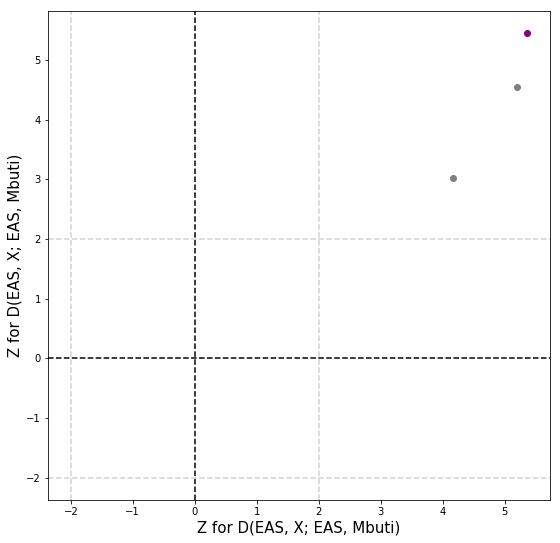

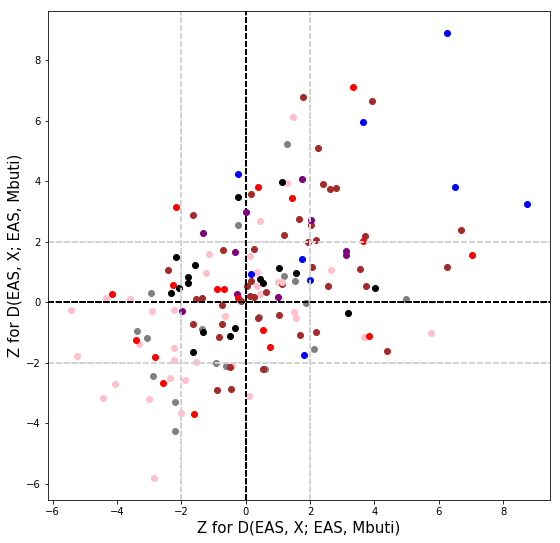

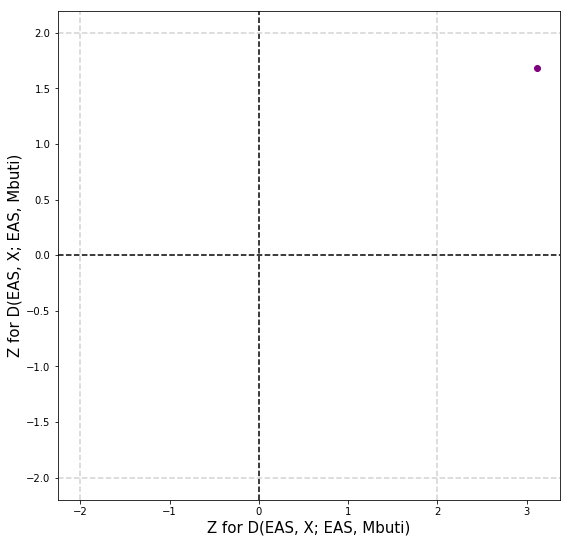

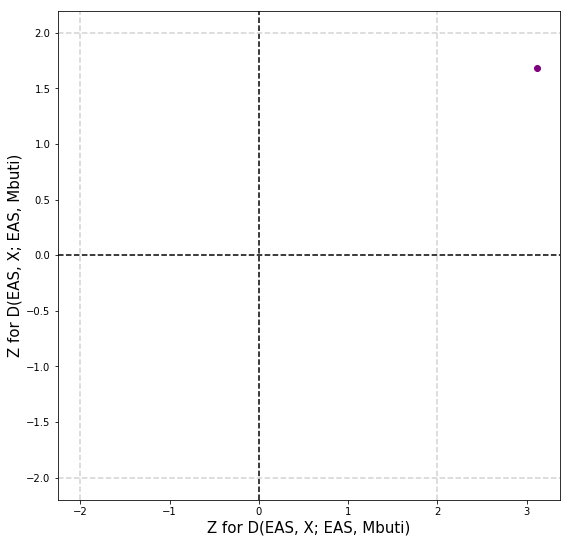

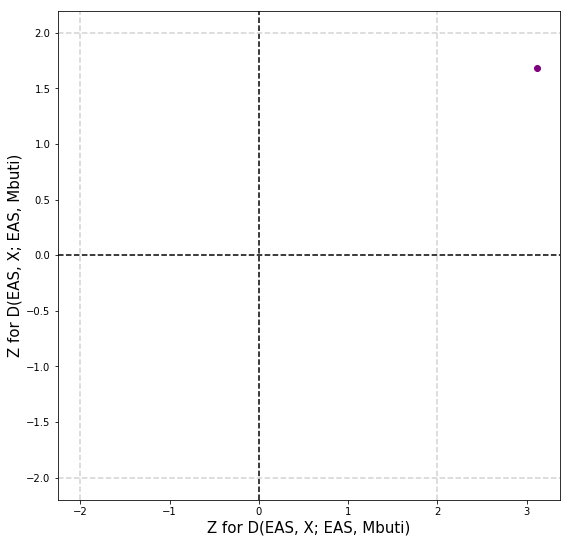

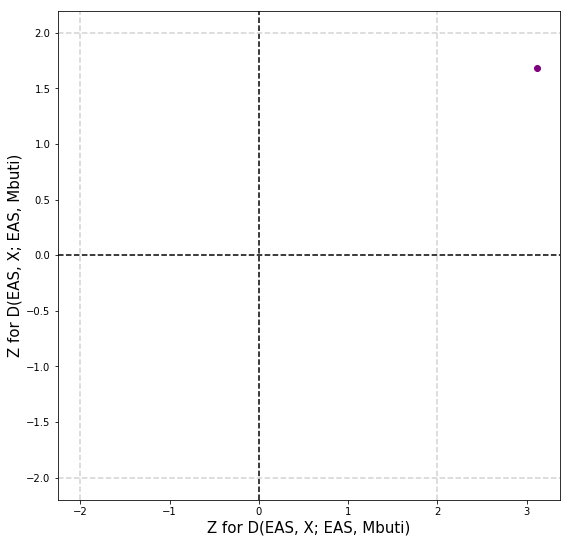

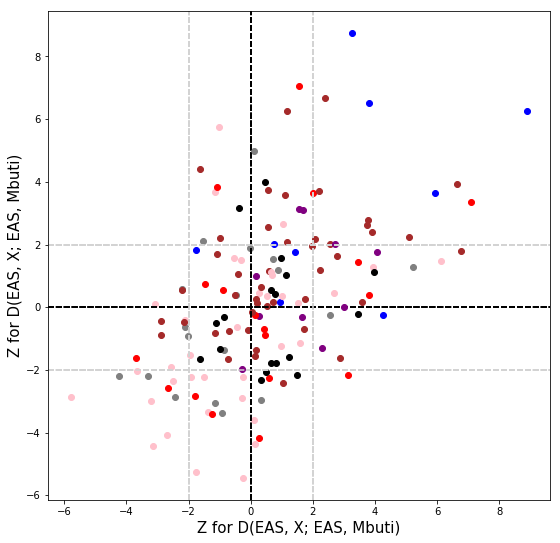

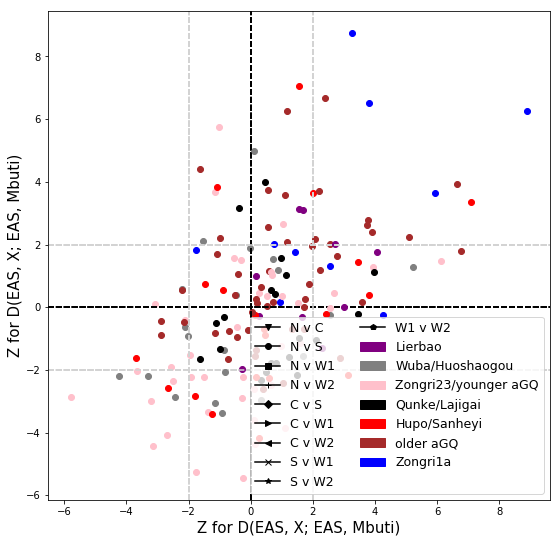

In [40]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
neas=["Oroqen"] #,"Hezhen","Daur","Xibo","Tu"]
ceas=["Japanese"] #,"Korean","Han","She","Miao","Tujia"]
seas=["Dai"] #,"Kinh","Lahu","Ami","Atayal"]
weas1=["Naxi"] #,"Yi"] 
weas2=["Tibetan"] #,"Sherpa"]
easdict={"N":neas, "C":ceas, "S":seas, "W1":weas1, "W2":weas2}
eas=neas+ceas+seas+weas1+weas2
easlabels=["N"]*len(neas)+["C"]*len(ceas)+["S"]*len(seas)+["W1"]*len(weas1)+["W2"]*len(weas2)
eas=ceas+seas
easlabels=["C"]*len(ceas)+["S"]*len(seas)
#agq=["Zongri1a","Zongri23"]
#eur=["French","Sardinian","Finnish"]

zr1a=["Zongri1a"]
zr23_yagq=["Zongri23","Wenpuju","Qijiaping","Jinchankou"]
oagq=["Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi"]
hs=["Hupo","Sanheyi"]
middle=["Qunke","Lajigai"]
nperi=["Wuba","Huoshaogou"]
leb=["Lierbao"]
varypops=[zr1a,oagq,hs,middle,zr23_yagq,nperi,leb][::-1]
labels=["Zongri1a","older aGQ",'Hupo/Sanheyi',"Qunke/Lajigai","Zongri23/younger aGQ","Wuba/Huoshaogou",'Lierbao'][::-1] #/Papuan/Onge/Oase1

dxcluster=eas
dxpairs,pairlabels=([],[])
for indi,i in enumerate(dxcluster):
    for indj,j in enumerate(dxcluster):
        if indi<indj:
            dxpairs.append((i,j))
            pairlabels.append("%s v %s" % (easlabels[indi],easlabels[indj]))
print pairlabels
#dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
#pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">","<","x","*"]
markers={"N v S":"o",
         "N v C":"v",
         "N v W1":"s",
         "N v W2":"+",
         "C v S":"D",
         "C v W1":">",
         "C v W2":"<",
         "S v W1":"x",
         "S v W2":"*",
         "W1 v W2":"p"}
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    print ind,mypair
    #if ind % 10==0: print ind,mypair
    plotlabel="%s v %s" % (easlabels[eas.index(mypair[0])],easlabels[eas.index(mypair[1])])
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(EAS, X; EAS, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(EAS, X; EAS, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        if ivp==0:
            handles1.append(mlines.Line2D([],[],marker=markers[plotlabel],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
#ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

['N v C', 'N v S', 'N v W1', 'N v W2', 'C v S', 'C v W1', 'C v W2', 'S v W1', 'S v W2', 'W1 v W2']
10
0 ('Daur', 'Han')
1 ('Daur', 'Dai')
2 ('Daur', 'Naxi')
3 ('Daur', 'Tibetan')
4 ('Han', 'Dai')
5 ('Han', 'Naxi')
6 ('Han', 'Tibetan')
7 ('Dai', 'Naxi')
8 ('Dai', 'Tibetan')
9 ('Naxi', 'Tibetan')


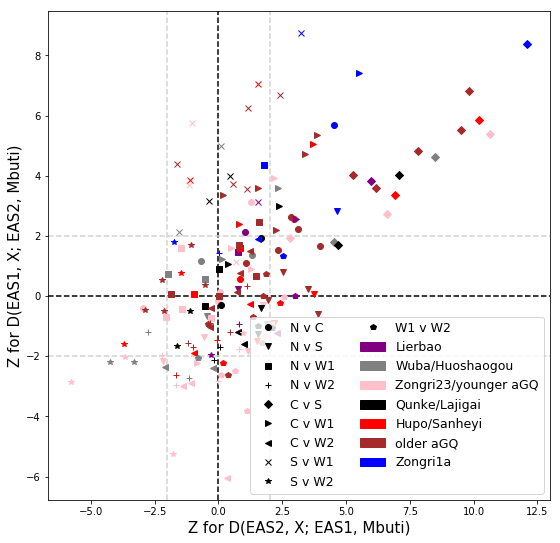

In [45]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
neas=["Daur"] #,"Hezhen","Daur","Xibo","Tu"]
ceas=["Han"]
seas=["Dai"]
weas1=["Naxi"] #,"Yi"] 
weas2=["Tibetan"] #,"Sherpa"]
easdict={"N":neas, "C":ceas, "S":seas, "W1":weas1, "W2":weas2}
eas=neas+ceas+seas+weas1+weas2
easlabels=["N"]*len(neas)+["C"]*len(ceas)+["S"]*len(seas)+["W1"]*len(weas1)+["W2"]*len(weas2)

#agq=["Zongri1a","Zongri23"]
#eur=["French","Sardinian","Finnish"]

zr1a=["Zongri1a"]
zr23_yagq=["Zongri23","Wenpuju","Qijiaping","Jinchankou"]
oagq=["Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi"]
hs=["Hupo","Sanheyi"]
middle=["Qunke","Lajigai"]
nperi=["Wuba","Huoshaogou"]
leb=["Lierbao"]
varypops=[zr1a,oagq,hs,middle,zr23_yagq,nperi,leb][::-1]
labels=["Zongri1a","older aGQ",'Hupo/Sanheyi',"Qunke/Lajigai","Zongri23/younger aGQ","Wuba/Huoshaogou",'Lierbao'][::-1] #/Papuan/Onge/Oase1

dxcluster=eas
dxpairs,pairlabels=([],[])
for indi,i in enumerate(dxcluster):
    for indj,j in enumerate(dxcluster):
        if indi<indj:
            dxpairs.append((i,j))
            pairlabels.append("%s v %s" % (easlabels[indi],easlabels[indj]))
print pairlabels
#dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
#pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">","<","x","*","p"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
ax1.set_ylabel("Z for D(EAS1, X; EAS2, %s)" % out,fontsize=15)
ax1.set_xlabel("Z for D(EAS2, X; EAS1, %s)" % out,fontsize=15)
ax1.axvline(x=0, ls='dashed', c='black')
ax1.axhline(y=0, ls='dashed', c='black')
ax1.axvline(x=2, ls='dashed', c='lightgray')
ax1.axhline(y=2, ls='dashed', c='lightgray')
ax1.axvline(x=-2, ls='dashed', c='lightgray')
ax1.axhline(y=-2, ls='dashed', c='lightgray')
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    print ind,mypair
    #if ind % 10==0: print ind,mypair
    plotlabel="%s v %s" % (easlabels[eas.index(mypair[0])],easlabels[eas.index(mypair[1])])
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))

    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,marker=markers[ind],linestyle="None",color=colors[ivp]) #markers[ind],
        if ivp==0:
            handles1.append(mlines.Line2D([],[],marker=markers[ind],linestyle="None",color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
#ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

In [33]:
eas.index(mypair[0])

4

## QQ Plot

In [ ]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
pairs=["Zongri1a","Zongri23","older aGQ","Hupo/Sanheyi",
       "Qunke/Lajigai/Wenpuju","northern periphery","Qijiaping/Jinchankou","Lierbao"]

eas=["Han","Dai","Ami","Daur","Sherpa","Tibetan","Naxi","Yi"]
aeur=["Kostenki14","Vestonice16","GoyetQ116-1","ElMiron","Villabruna","Loschbour"]
aeur2=["Satsurblia","Kotias"]
natufian=["Natufian"]
ane=["Malta1"]
ancother=["UstIshim"]
othereas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
varypops=[othereas, ane,eas,natufian,ancother, aeur,aeur2][::-1]
labels=["Tianyuan","Mal'ta1","EAS",'Natufian',"Ust'-Ishim","aWEUR",'aWEUR w/BE'][::-1] #/Papuan/Onge/Oase1
dxcluster=agq
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    if ind % 10==0: print ind,mypair
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(aGQ1, X; aGQ2, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(aGQ2, X; aGQ1, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        #if ivp==0:
        #    handles1.append(mlines.Line2D([],[],marker=markers[ind],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
#ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

## Make Tables

In [25]:
import numpy as np
import plateaumodules as pm

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv="."
fh,out=("aPlateau%s.dstat.log"%tv,"Mbuti")

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tibetan","Sherpa"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=agq
popB=anx
thirdpops=eas
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"aGQ_%s_aNX_%s" % (myind,out)
    newfh2=fh.split(".")[0]+tv+DorZ+"."+"aNX_%s_aGQ_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops1,(1,3),(0,2),DorZ)    
    print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh1,popA,popB,0,2)

    Zary = pm.mkDary(pD,fh,mypops2,(1,3),(2,0),DorZ)   
    print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh2,popA,popB,2,0)

Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aGQ_Daur_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aNX_Daur_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aGQ_Han_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aNX_Han_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aGQ_Dai_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aNX_Dai_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aGQ_Ami_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aNX_Ami_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aGQ_Naxi_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aNX_Naxi_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aGQ_Yi_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateau.tvZ.aNX_Yi_aGQ_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dst

In [5]:
import numpy as np
import plateaumodules as pm

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
tv=""
fh,out=("aPlateau%s.dstat.log"%tv,"Mbuti")
#fh,out=("aPlateau%s.dstat.log"%tv,"Chimp")
agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
eas=["Ulchi","Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
    "Han","Tujia","She","Miao","Ami","Atayal","Dai","Kinh","Lahu",
     "Naxi","Yi","Tu","Tibetan","Sherpa"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=eas
popB=eas
thirdpops=["UstIshim","GoyetQ116-1","Natufian","Malta1","Papuan","Onge"]
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,popB,myind,out]
    #mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"EAS_EAS_%s_%s" % (myind,out)
    #newfh2=fh.split(".")[0]+tv+DorZ+"."+"aGQ_%s_aGQ_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops1,(2,3),(0,1),DorZ)    
    print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh1,popA,popB,0,1)

    #Zary = pm.mkDary(pD,fh,mypops2,(1,3),(2,0),DorZ)   
    #print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh2,popA,popB,2,0)

Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateauZ.EAS_EAS_UstIshim_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateauZ.EAS_EAS_GoyetQ116-1_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateauZ.EAS_EAS_Natufian_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_AA/aPlateauZ.EAS_EAS_Malta1_Mbuti!


KeyError: ('Ulchi', 'Oroqen', 'Papuan', 'Mbuti')

In [ ]:
import numpy as np
import plateaumodules as pm

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
tv=""
fh,out=("aPlateau%s.dstat.log"%tv,"Mbuti")

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tibetan","Sherpa"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=agq
popB=agq
thirdpops=anx
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"aGQ_%s_aGQ_%s" % (myind,out)
    #newfh2=fh.split(".")[0]+tv+DorZ+"."+"aGQ_%s_aGQ_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops1,(1,3),(0,2),DorZ)    
    print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh1,popA,popB,0,2)

    #Zary = pm.mkDary(pD,fh,mypops2,(1,3),(2,0),DorZ)   
    #print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh2,popA,popB,2,0)

/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Zongri1a_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Zongri23_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Shangluzhuang_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Hejiatai_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Heodong_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Daxiang_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Xiahaishi_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Hupo_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Sanheyi_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Qunke_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Lajigai_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_AA/D_EAS_Wenpuju_EAS_Mbuti_tv_heatmap.png
/mnt/solex

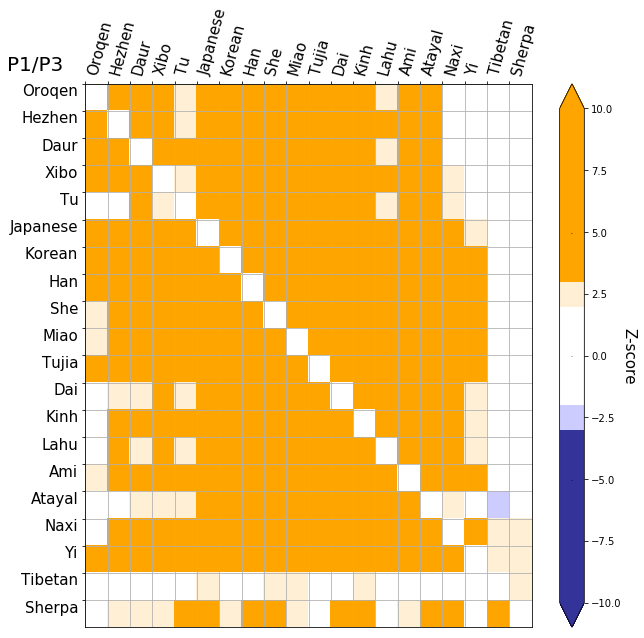

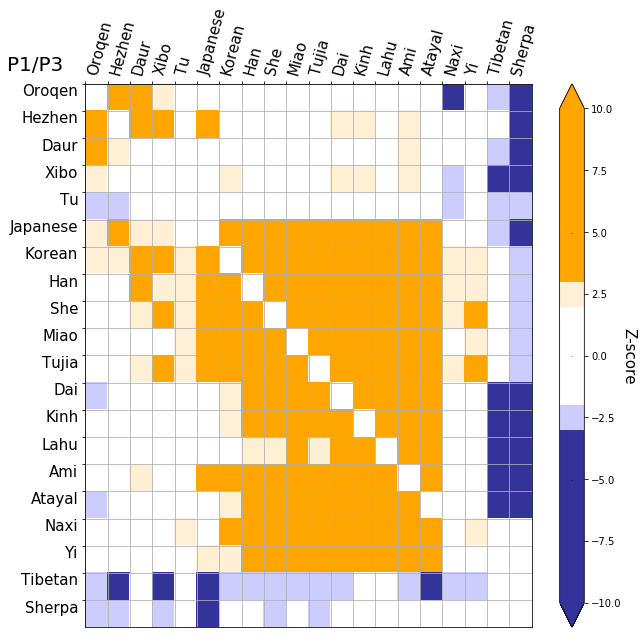

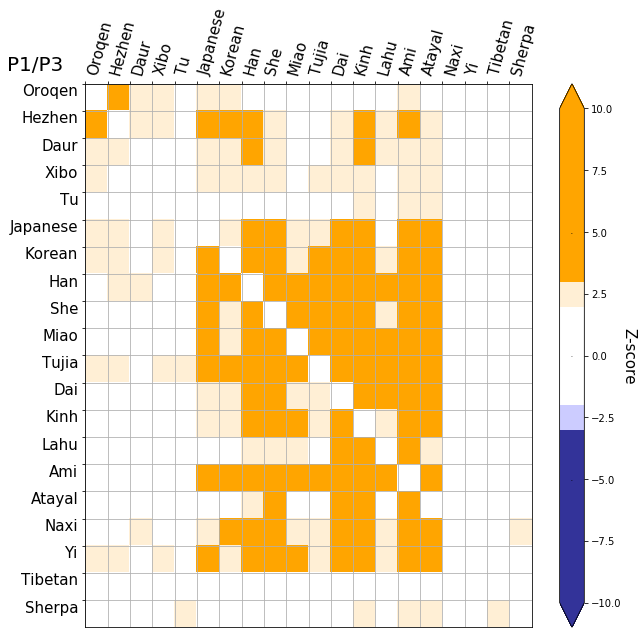

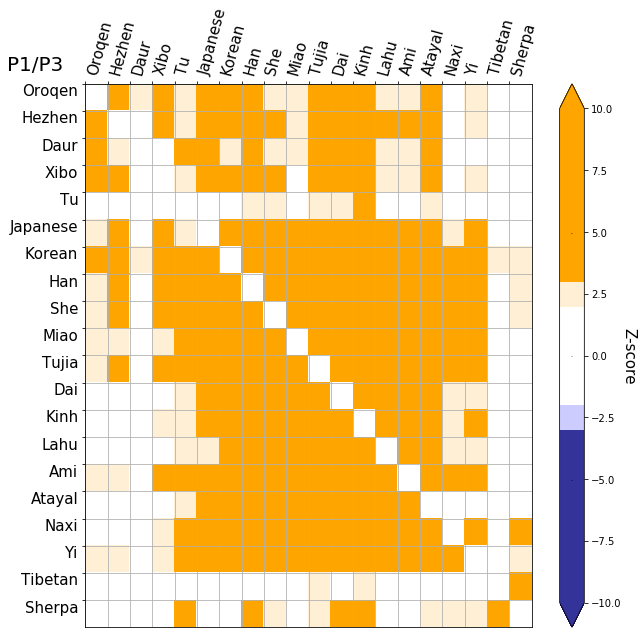

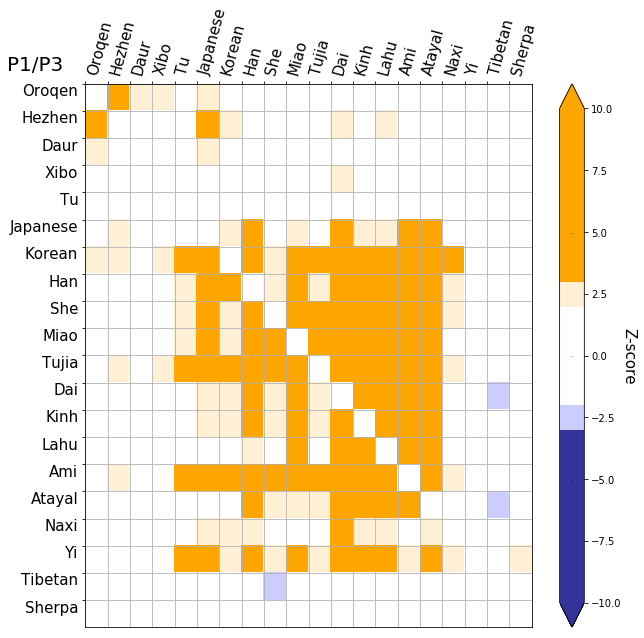

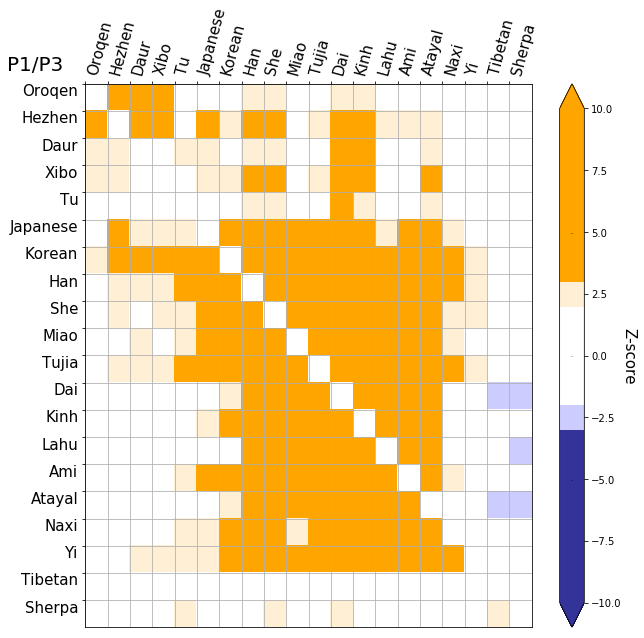

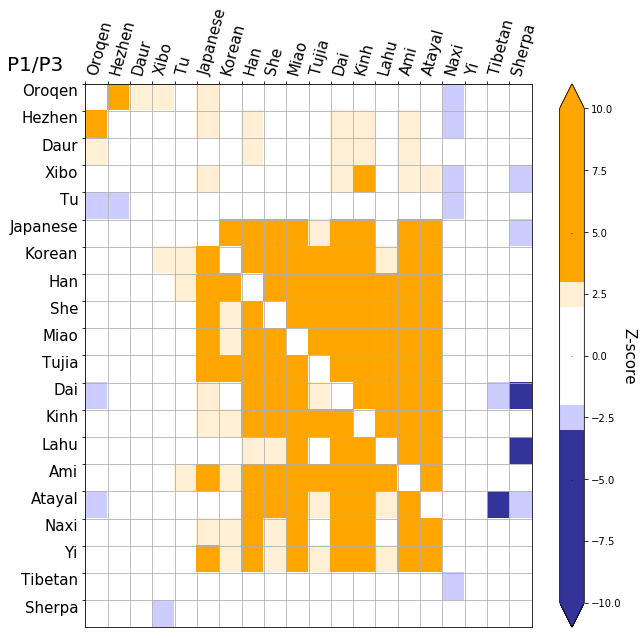

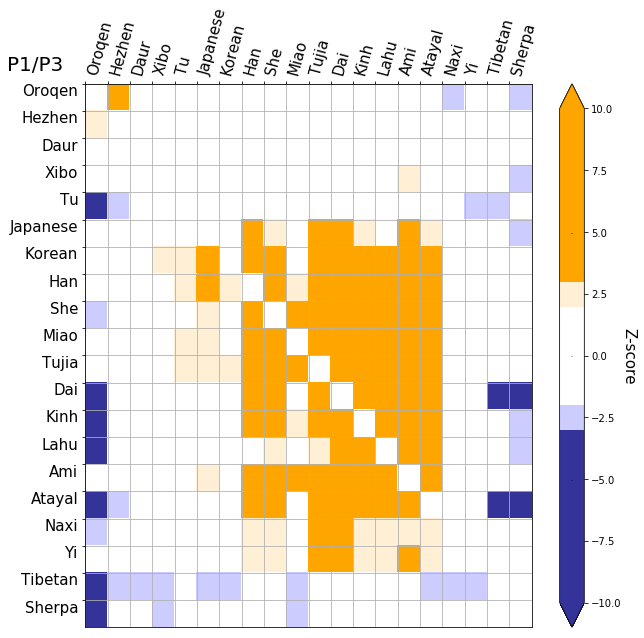

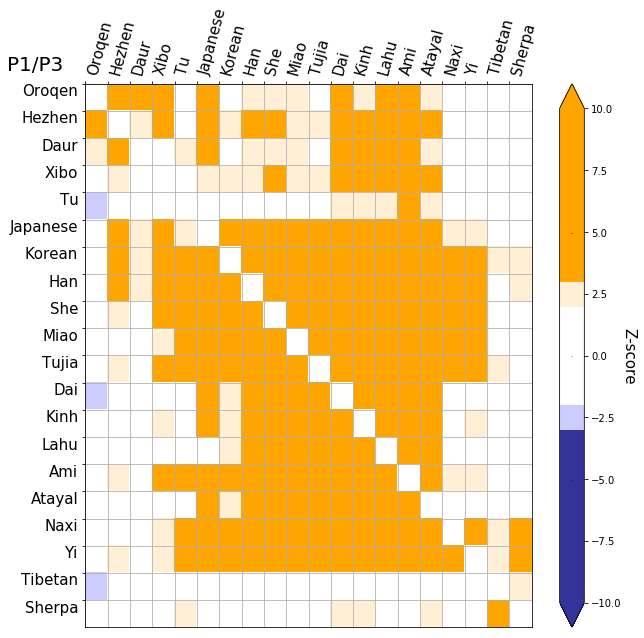

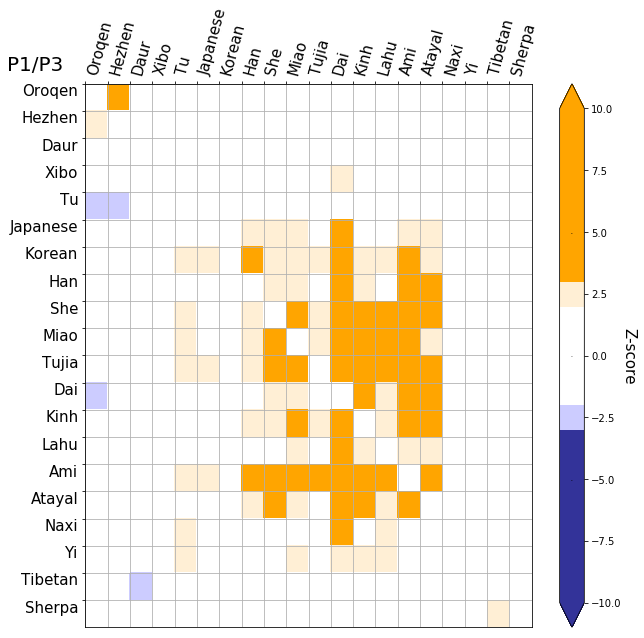

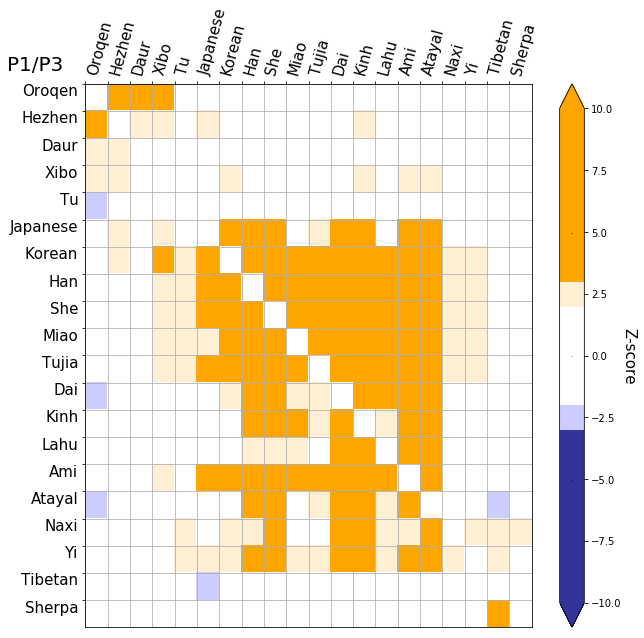

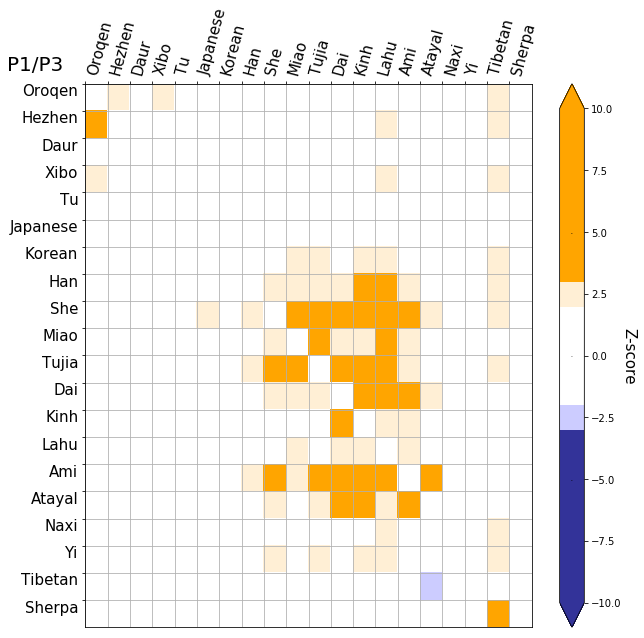

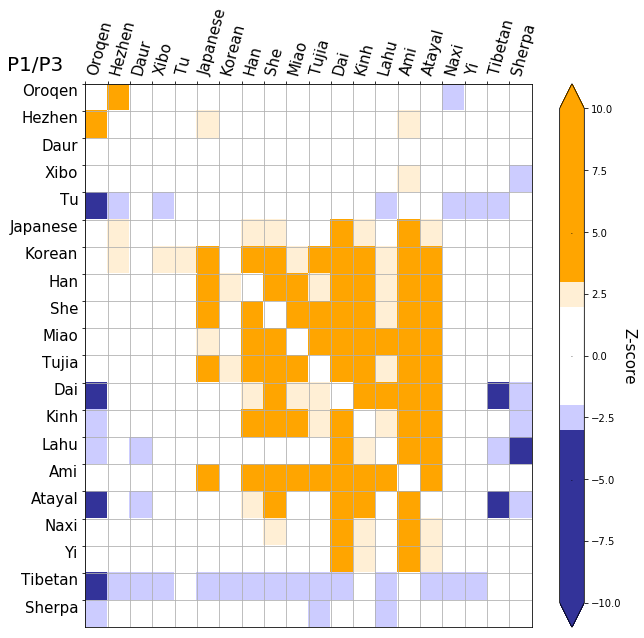

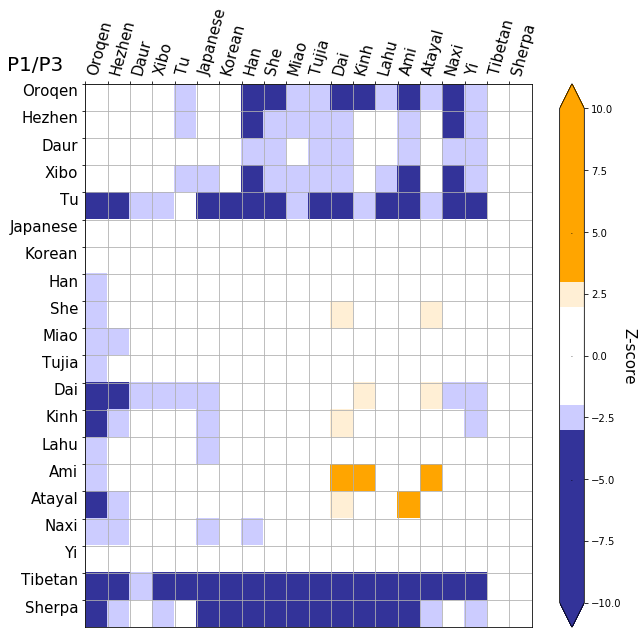

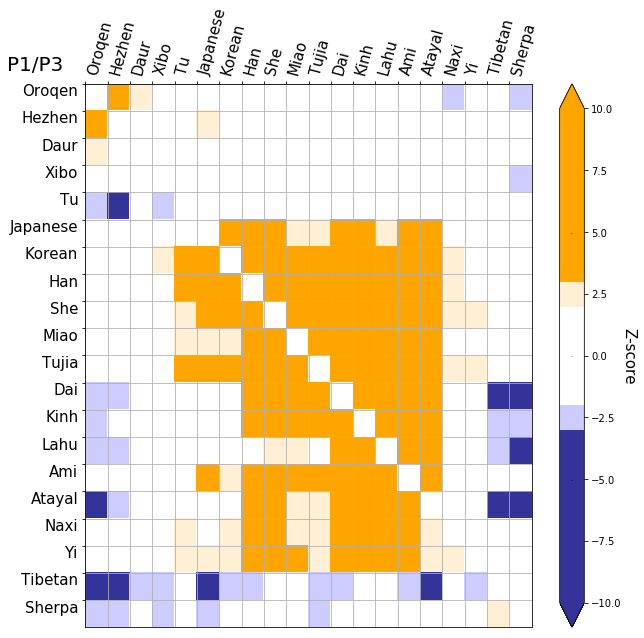

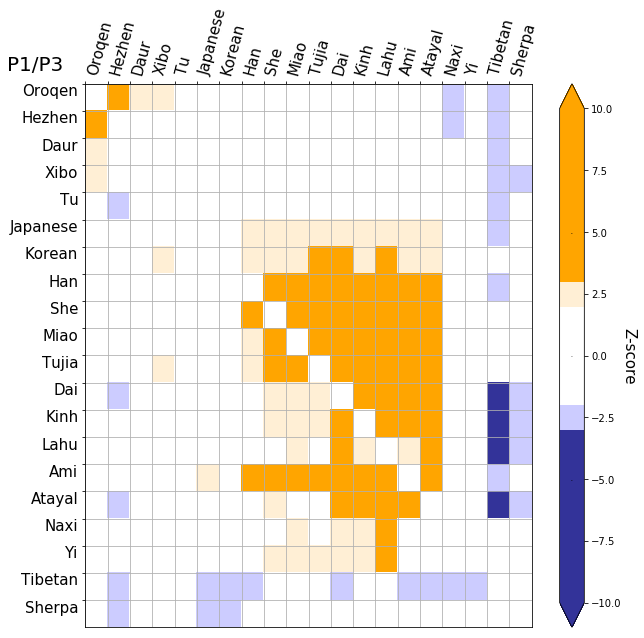

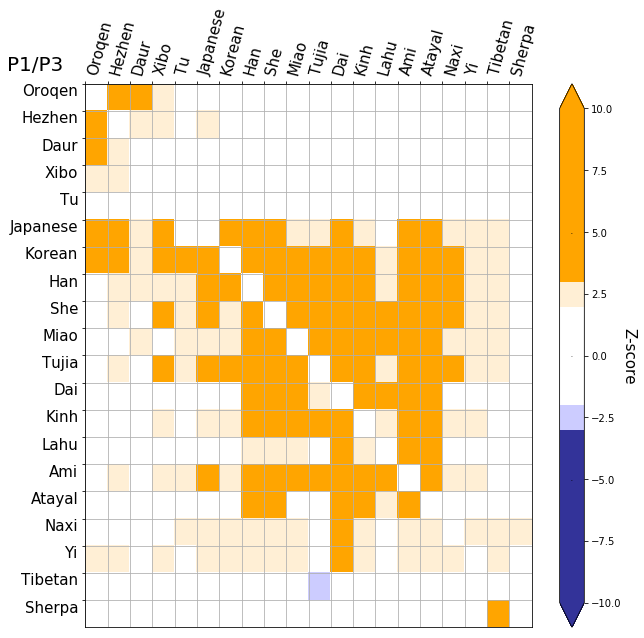

Lierbao


In [4]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
pD="/mnt/solexa/mel_yang/aPlateau/"
#fh,tv,out=("aPlateau.dstat.log",'all','Chimp')
fh,tv,out=("aPlateau.tv.dstat.log",'tv','Mbuti')
fs=15
agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
eas=["Oroqen","Hezhen","Daur","Xibo","Tu","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tibetan","Sherpa"]
#eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tibetan","Sherpa"]
wantedcolors=["blue"]*len(anx)
header1,header2=eas,eas
popA=eas
popB=eas

varypop=agq
myinds=varypop

for count,myind in enumerate(myinds):
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"
    newname="D_EAS_%s_EAS_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops1,(1,3),(0,2),'Z')
    Dary = pm.mkDary(pD,fh,mypops1,(1,3),(0,2),'D')
    mylabel="D(%s,%s;%s,%s)" % ('P1',myind,"P3",out)
    Zary = np.nan_to_num(Zary)
    
    levels = range(-10,11)
    multiplier=((len(levels)-6)/2)+1
    colors = ['#333399']*multiplier + ['#CCCCFF'] + ['white']*4 + ['#FFEFD5'] + ['orange']*multiplier
    cmap1,norm = matplotlib.colors.from_levels_and_colors(levels, colors,extend='both')
    
    fig,ax = plt.subplots(figsize=(10,10))
    heatmap = ax.pcolor(Zary ,cmap=cmap1, vmin=-10,vmax=10)
    cbar=plt.colorbar(heatmap)
    
    ##LEGEND
    cbar.ax.text(.5, 0.25, '$D<0$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.text(.5, 0.5, '$N.S.$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.text(.5, 0.75, '$D>0$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Z-score', rotation=270,fontsize=fs)
    
    ax.grid(True)
    ax.set_xticks(np.arange(len(header2)), minor=False)
    ax.set_yticks(np.arange(len(header1)), minor=False)
    
    column_labels = header2
    row_labels = header1
    ax.set_xlim((0,len(header2)))
    ax.set_ylim((0,len(header1)))
    ax.set_xticklabels(column_labels, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(row_labels, minor=False,fontsize=fs,va='top')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.text(-3.5,-0.5,"P1/P3",fontsize=fs+5)
    newfilename='/mnt/solexa/mel_yang/aPlateau/images/SI_AA/%s_%s_heatmap.png' % (newname,tv)
    print newfilename
    fig.savefig(newfilename)
    
plt.show()
print myind